In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Dropout
from tensorflow.keras.layers import BatchNormalization, Activation, LeakyReLU, UpSampling2D, Conv2D
from tensorflow.keras.models import Sequential, Model

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

#이미지가 저장될 폴더가 없다면 만듭니다.
import os
if not os.path.exists("./gan_images"):
    os.makedirs("./gan_images")

np.random.seed(3)
tf.random.set_seed(3)

In [2]:
#생성자 모델을 만듭니다.
generator = Sequential()
generator.add(Dense(128*7*7, input_dim=100, activation=LeakyReLU(0.2)))
generator.add(BatchNormalization())
generator.add(Reshape((7, 7, 128)))
generator.add(UpSampling2D())
generator.add(Conv2D(64, kernel_size=5, padding='same'))
generator.add(BatchNormalization())
generator.add(Activation(LeakyReLU(0.2)))
generator.add(UpSampling2D())
generator.add(Conv2D(1, kernel_size=5, padding='same', activation='tanh'))

In [3]:
#판별자 모델을 만듭니다.
discriminator = Sequential()
discriminator.add(Conv2D(64, kernel_size=5, strides=2, input_shape=(28,28,1), padding="same"))
discriminator.add(Activation(LeakyReLU(0.2)))
discriminator.add(Dropout(0.3))
discriminator.add(Conv2D(128, kernel_size=5, strides=2, padding="same"))
discriminator.add(Activation(LeakyReLU(0.2)))
discriminator.add(Dropout(0.3))
discriminator.add(Flatten())
discriminator.add(Dense(1, activation='sigmoid'))
discriminator.compile(loss='binary_crossentropy', optimizer='adam')
discriminator.trainable = False

In [4]:
#생성자와 판별자 모델을 연결시키는 gan 모델을 만듭니다.
ginput = Input(shape=(100,))
dis_output = discriminator(generator(ginput))
gan = Model(ginput, dis_output)
gan.compile(loss='binary_crossentropy', optimizer='adam')
gan.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
sequential (Sequential)      (None, 28, 28, 1)         865281    
_________________________________________________________________
sequential_1 (Sequential)    (None, 1)                 212865    
Total params: 1,078,146
Trainable params: 852,609
Non-trainable params: 225,537
_________________________________________________________________


epoch:0  d_loss:0.7053  g_loss:0.6912
epoch:1  d_loss:0.4617  g_loss:0.3278
epoch:2  d_loss:0.5693  g_loss:0.1024
epoch:3  d_loss:0.6593  g_loss:0.0837
epoch:4  d_loss:0.5770  g_loss:0.1641
epoch:5  d_loss:0.5092  g_loss:0.4206
epoch:6  d_loss:0.4873  g_loss:0.6972
epoch:7  d_loss:0.5090  g_loss:0.8721
epoch:8  d_loss:0.4976  g_loss:0.8954
epoch:9  d_loss:0.4877  g_loss:0.8695
epoch:10  d_loss:0.4186  g_loss:0.7792
epoch:11  d_loss:0.4463  g_loss:0.8067
epoch:12  d_loss:0.4999  g_loss:0.8511
epoch:13  d_loss:0.4883  g_loss:0.8900
epoch:14  d_loss:0.5858  g_loss:0.9510
epoch:15  d_loss:0.4796  g_loss:1.0425
epoch:16  d_loss:0.4165  g_loss:1.0446
epoch:17  d_loss:0.6310  g_loss:0.8198
epoch:18  d_loss:0.5576  g_loss:0.6647
epoch:19  d_loss:0.4578  g_loss:0.7245
epoch:20  d_loss:0.4308  g_loss:0.7659
epoch:21  d_loss:0.5038  g_loss:0.7922
epoch:22  d_loss:0.5036  g_loss:0.6539
epoch:23  d_loss:0.4523  g_loss:0.6055
epoch:24  d_loss:0.4401  g_loss:0.6659
epoch:25  d_loss:0.4545  g_loss:0.6

epoch:208  d_loss:0.4659  g_loss:2.0016
epoch:209  d_loss:0.2614  g_loss:2.0860
epoch:210  d_loss:0.4314  g_loss:2.1297
epoch:211  d_loss:0.4489  g_loss:1.7915
epoch:212  d_loss:0.4381  g_loss:1.8466
epoch:213  d_loss:0.5164  g_loss:2.1236
epoch:214  d_loss:0.4625  g_loss:1.9765
epoch:215  d_loss:0.4179  g_loss:1.7598
epoch:216  d_loss:0.6044  g_loss:1.8791
epoch:217  d_loss:0.4373  g_loss:1.6120
epoch:218  d_loss:0.4465  g_loss:1.6686
epoch:219  d_loss:0.5025  g_loss:1.5804
epoch:220  d_loss:0.4757  g_loss:1.5960
epoch:221  d_loss:0.7635  g_loss:1.3110
epoch:222  d_loss:0.5012  g_loss:1.4184
epoch:223  d_loss:0.5141  g_loss:1.9045
epoch:224  d_loss:0.6441  g_loss:1.6723
epoch:225  d_loss:0.5635  g_loss:1.5432
epoch:226  d_loss:0.4989  g_loss:1.7377
epoch:227  d_loss:0.6532  g_loss:1.3154
epoch:228  d_loss:0.5450  g_loss:1.5431
epoch:229  d_loss:0.5180  g_loss:1.2782
epoch:230  d_loss:0.6460  g_loss:1.7234
epoch:231  d_loss:0.6732  g_loss:1.9067
epoch:232  d_loss:0.7757  g_loss:1.7305


epoch:413  d_loss:0.3704  g_loss:1.8495
epoch:414  d_loss:0.5720  g_loss:1.5808
epoch:415  d_loss:0.3747  g_loss:1.8245
epoch:416  d_loss:0.4241  g_loss:1.9611
epoch:417  d_loss:0.3082  g_loss:2.3366
epoch:418  d_loss:0.3547  g_loss:2.6584
epoch:419  d_loss:0.3455  g_loss:2.3312
epoch:420  d_loss:0.2645  g_loss:2.2580
epoch:421  d_loss:0.4537  g_loss:2.0253
epoch:422  d_loss:0.3413  g_loss:2.3164
epoch:423  d_loss:0.4410  g_loss:2.3725
epoch:424  d_loss:0.3902  g_loss:2.5719
epoch:425  d_loss:0.3239  g_loss:2.0420
epoch:426  d_loss:0.2851  g_loss:2.1722
epoch:427  d_loss:0.3483  g_loss:2.1144
epoch:428  d_loss:0.3561  g_loss:2.2115
epoch:429  d_loss:0.3350  g_loss:2.8098
epoch:430  d_loss:0.3113  g_loss:2.9677
epoch:431  d_loss:0.2834  g_loss:2.5672
epoch:432  d_loss:0.2543  g_loss:2.9672
epoch:433  d_loss:0.3603  g_loss:2.6056
epoch:434  d_loss:0.4121  g_loss:2.4312
epoch:435  d_loss:0.5847  g_loss:2.1842
epoch:436  d_loss:0.2034  g_loss:2.7992
epoch:437  d_loss:0.3888  g_loss:2.9874


epoch:620  d_loss:0.5560  g_loss:1.0598
epoch:621  d_loss:0.6117  g_loss:0.8299
epoch:622  d_loss:0.6743  g_loss:1.2262
epoch:623  d_loss:0.4949  g_loss:1.5434
epoch:624  d_loss:0.5935  g_loss:1.5965
epoch:625  d_loss:0.7459  g_loss:0.9614
epoch:626  d_loss:0.4653  g_loss:1.0360
epoch:627  d_loss:0.2471  g_loss:2.2013
epoch:628  d_loss:0.2909  g_loss:2.1718
epoch:629  d_loss:0.1866  g_loss:2.9913
epoch:630  d_loss:0.2679  g_loss:2.6540
epoch:631  d_loss:0.1705  g_loss:2.3233
epoch:632  d_loss:0.2553  g_loss:1.7493
epoch:633  d_loss:0.2816  g_loss:1.8247
epoch:634  d_loss:0.1328  g_loss:2.1869
epoch:635  d_loss:0.2281  g_loss:2.7190
epoch:636  d_loss:0.3451  g_loss:2.2039
epoch:637  d_loss:0.3092  g_loss:2.0126
epoch:638  d_loss:0.1768  g_loss:2.1610
epoch:639  d_loss:0.2825  g_loss:2.4621
epoch:640  d_loss:0.3384  g_loss:2.0322
epoch:641  d_loss:0.5363  g_loss:1.2249
epoch:642  d_loss:0.4379  g_loss:1.4915
epoch:643  d_loss:0.5106  g_loss:1.5534
epoch:644  d_loss:0.6073  g_loss:2.0610


epoch:827  d_loss:0.4832  g_loss:1.5594
epoch:828  d_loss:0.4941  g_loss:1.7705
epoch:829  d_loss:0.6068  g_loss:1.7727
epoch:830  d_loss:0.5376  g_loss:2.0731
epoch:831  d_loss:0.6061  g_loss:2.0271
epoch:832  d_loss:0.5451  g_loss:1.6275
epoch:833  d_loss:0.5046  g_loss:1.6079
epoch:834  d_loss:0.6747  g_loss:1.6536
epoch:835  d_loss:0.8530  g_loss:1.3061
epoch:836  d_loss:0.5951  g_loss:1.1268
epoch:837  d_loss:0.6387  g_loss:1.4413
epoch:838  d_loss:0.5975  g_loss:1.6201
epoch:839  d_loss:0.4942  g_loss:1.8624
epoch:840  d_loss:0.6150  g_loss:1.4143
epoch:841  d_loss:0.5985  g_loss:1.1978
epoch:842  d_loss:0.5760  g_loss:1.1811
epoch:843  d_loss:0.5494  g_loss:1.6177
epoch:844  d_loss:0.4094  g_loss:2.1715
epoch:845  d_loss:0.4167  g_loss:2.2990
epoch:846  d_loss:0.3972  g_loss:2.1091
epoch:847  d_loss:0.4910  g_loss:2.1443
epoch:848  d_loss:0.2556  g_loss:2.3585
epoch:849  d_loss:0.3571  g_loss:1.9031
epoch:850  d_loss:0.2207  g_loss:2.0891
epoch:851  d_loss:0.3160  g_loss:2.5592


epoch:1032  d_loss:0.2205  g_loss:2.0874
epoch:1033  d_loss:0.3450  g_loss:1.9501
epoch:1034  d_loss:0.2528  g_loss:1.8805
epoch:1035  d_loss:0.2461  g_loss:2.4637
epoch:1036  d_loss:0.3587  g_loss:2.9589
epoch:1037  d_loss:0.3110  g_loss:3.0494
epoch:1038  d_loss:0.3346  g_loss:2.6446
epoch:1039  d_loss:0.3339  g_loss:2.4610
epoch:1040  d_loss:0.3040  g_loss:2.0471
epoch:1041  d_loss:0.3787  g_loss:1.9585
epoch:1042  d_loss:0.3862  g_loss:2.0637
epoch:1043  d_loss:0.2972  g_loss:2.2196
epoch:1044  d_loss:0.2370  g_loss:2.4210
epoch:1045  d_loss:0.3094  g_loss:2.5937
epoch:1046  d_loss:0.3467  g_loss:2.0968
epoch:1047  d_loss:0.2754  g_loss:2.5270
epoch:1048  d_loss:0.3223  g_loss:2.1752
epoch:1049  d_loss:0.2829  g_loss:2.4550
epoch:1050  d_loss:0.2950  g_loss:2.5614
epoch:1051  d_loss:0.3620  g_loss:2.1564
epoch:1052  d_loss:0.3554  g_loss:2.2911
epoch:1053  d_loss:0.3620  g_loss:2.1874
epoch:1054  d_loss:0.1825  g_loss:2.3256
epoch:1055  d_loss:0.3046  g_loss:2.5775
epoch:1056  d_lo

epoch:1234  d_loss:0.3082  g_loss:2.1186
epoch:1235  d_loss:0.5048  g_loss:1.9414
epoch:1236  d_loss:0.2852  g_loss:2.3569
epoch:1237  d_loss:0.5065  g_loss:2.2619
epoch:1238  d_loss:0.5997  g_loss:1.8800
epoch:1239  d_loss:0.4074  g_loss:1.8632
epoch:1240  d_loss:0.4165  g_loss:1.7368
epoch:1241  d_loss:0.5473  g_loss:1.7957
epoch:1242  d_loss:0.4208  g_loss:2.0950
epoch:1243  d_loss:0.4321  g_loss:2.4276
epoch:1244  d_loss:0.4486  g_loss:1.9627
epoch:1245  d_loss:0.5808  g_loss:2.0548
epoch:1246  d_loss:0.4315  g_loss:2.0136
epoch:1247  d_loss:0.3625  g_loss:2.2134
epoch:1248  d_loss:0.4503  g_loss:1.7887
epoch:1249  d_loss:0.3650  g_loss:1.9611
epoch:1250  d_loss:0.4641  g_loss:2.0006
epoch:1251  d_loss:0.5107  g_loss:2.1496
epoch:1252  d_loss:0.3233  g_loss:2.4825
epoch:1253  d_loss:0.3897  g_loss:2.2722
epoch:1254  d_loss:0.2932  g_loss:2.1531
epoch:1255  d_loss:0.3678  g_loss:2.3256
epoch:1256  d_loss:0.3397  g_loss:2.2074
epoch:1257  d_loss:0.3680  g_loss:1.9686
epoch:1258  d_lo

epoch:1434  d_loss:0.4547  g_loss:1.5767
epoch:1435  d_loss:0.5095  g_loss:1.1568
epoch:1436  d_loss:0.4413  g_loss:1.3082
epoch:1437  d_loss:0.3241  g_loss:2.3192
epoch:1438  d_loss:0.4113  g_loss:2.6270
epoch:1439  d_loss:0.4305  g_loss:2.4930
epoch:1440  d_loss:0.3722  g_loss:2.8100
epoch:1441  d_loss:0.3780  g_loss:1.7965
epoch:1442  d_loss:0.4092  g_loss:1.5132
epoch:1443  d_loss:0.4989  g_loss:1.6422
epoch:1444  d_loss:0.3799  g_loss:2.0710
epoch:1445  d_loss:0.2405  g_loss:2.7299
epoch:1446  d_loss:0.2779  g_loss:2.9592
epoch:1447  d_loss:0.3618  g_loss:2.9589
epoch:1448  d_loss:0.3591  g_loss:2.9908
epoch:1449  d_loss:0.3452  g_loss:2.3441
epoch:1450  d_loss:0.4082  g_loss:1.9139
epoch:1451  d_loss:0.3054  g_loss:1.9058
epoch:1452  d_loss:0.4735  g_loss:2.5637
epoch:1453  d_loss:0.3973  g_loss:1.9612
epoch:1454  d_loss:0.4438  g_loss:2.1513
epoch:1455  d_loss:0.3677  g_loss:2.6486
epoch:1456  d_loss:0.4178  g_loss:2.0170
epoch:1457  d_loss:0.3483  g_loss:2.0607
epoch:1458  d_lo

epoch:1635  d_loss:0.4487  g_loss:1.8347
epoch:1636  d_loss:0.3835  g_loss:1.5244
epoch:1637  d_loss:0.5071  g_loss:1.2598
epoch:1638  d_loss:0.3589  g_loss:1.6707
epoch:1639  d_loss:0.3993  g_loss:1.5944
epoch:1640  d_loss:0.3781  g_loss:1.5712
epoch:1641  d_loss:0.3315  g_loss:1.5445
epoch:1642  d_loss:0.3172  g_loss:2.2245
epoch:1643  d_loss:0.5220  g_loss:1.9959
epoch:1644  d_loss:0.4113  g_loss:1.9958
epoch:1645  d_loss:0.5395  g_loss:1.3322
epoch:1646  d_loss:0.4063  g_loss:1.3399
epoch:1647  d_loss:0.4455  g_loss:1.3118
epoch:1648  d_loss:0.5160  g_loss:1.5520
epoch:1649  d_loss:0.5272  g_loss:1.5917
epoch:1650  d_loss:0.5712  g_loss:1.5005
epoch:1651  d_loss:0.6526  g_loss:1.5239
epoch:1652  d_loss:0.4987  g_loss:1.3343
epoch:1653  d_loss:0.4555  g_loss:1.3839
epoch:1654  d_loss:0.5030  g_loss:1.7784
epoch:1655  d_loss:0.4672  g_loss:1.5103
epoch:1656  d_loss:0.4202  g_loss:1.7522
epoch:1657  d_loss:0.5231  g_loss:1.5856
epoch:1658  d_loss:0.6223  g_loss:1.3578
epoch:1659  d_lo

epoch:1836  d_loss:0.4545  g_loss:1.6486
epoch:1837  d_loss:0.4351  g_loss:1.6197
epoch:1838  d_loss:0.5532  g_loss:1.5634
epoch:1839  d_loss:0.5030  g_loss:1.2199
epoch:1840  d_loss:0.4630  g_loss:1.2820
epoch:1841  d_loss:0.5761  g_loss:1.2076
epoch:1842  d_loss:0.4522  g_loss:1.4985
epoch:1843  d_loss:0.4070  g_loss:1.7963
epoch:1844  d_loss:0.6305  g_loss:1.4444
epoch:1845  d_loss:0.5571  g_loss:1.2861
epoch:1846  d_loss:0.5036  g_loss:1.4127
epoch:1847  d_loss:0.6985  g_loss:1.0440
epoch:1848  d_loss:0.5478  g_loss:1.3367
epoch:1849  d_loss:0.4955  g_loss:1.5028
epoch:1850  d_loss:0.6174  g_loss:1.3286
epoch:1851  d_loss:0.5812  g_loss:1.4458
epoch:1852  d_loss:0.6410  g_loss:1.4589
epoch:1853  d_loss:0.4909  g_loss:1.6936
epoch:1854  d_loss:0.4409  g_loss:1.5054
epoch:1855  d_loss:0.4823  g_loss:1.4127
epoch:1856  d_loss:0.4079  g_loss:1.4832
epoch:1857  d_loss:0.4394  g_loss:1.6101
epoch:1858  d_loss:0.4272  g_loss:1.7813
epoch:1859  d_loss:0.4414  g_loss:1.7960
epoch:1860  d_lo

epoch:2036  d_loss:0.4877  g_loss:1.5341
epoch:2037  d_loss:0.5532  g_loss:1.6165
epoch:2038  d_loss:0.3984  g_loss:1.6029
epoch:2039  d_loss:0.4291  g_loss:1.6775
epoch:2040  d_loss:0.4416  g_loss:1.7189
epoch:2041  d_loss:0.4515  g_loss:1.8497
epoch:2042  d_loss:0.4866  g_loss:1.5154
epoch:2043  d_loss:0.5924  g_loss:1.7883
epoch:2044  d_loss:0.5739  g_loss:1.5671
epoch:2045  d_loss:0.3688  g_loss:1.6368
epoch:2046  d_loss:0.5244  g_loss:1.6547
epoch:2047  d_loss:0.5458  g_loss:1.4415
epoch:2048  d_loss:0.3952  g_loss:2.0591
epoch:2049  d_loss:0.5221  g_loss:1.6655
epoch:2050  d_loss:0.4703  g_loss:1.4172
epoch:2051  d_loss:0.5040  g_loss:1.7173
epoch:2052  d_loss:0.4896  g_loss:1.6070
epoch:2053  d_loss:0.4810  g_loss:1.6930
epoch:2054  d_loss:0.6887  g_loss:1.4326
epoch:2055  d_loss:0.5418  g_loss:1.4527
epoch:2056  d_loss:0.4323  g_loss:1.4878
epoch:2057  d_loss:0.4899  g_loss:1.4683
epoch:2058  d_loss:0.4803  g_loss:1.4524
epoch:2059  d_loss:0.6076  g_loss:1.6449
epoch:2060  d_lo

epoch:2237  d_loss:0.4518  g_loss:1.3663
epoch:2238  d_loss:0.5068  g_loss:1.7277
epoch:2239  d_loss:0.4922  g_loss:1.7726
epoch:2240  d_loss:0.4808  g_loss:1.8097
epoch:2241  d_loss:0.5153  g_loss:1.5810
epoch:2242  d_loss:0.5214  g_loss:1.3211
epoch:2243  d_loss:0.5833  g_loss:1.1546
epoch:2244  d_loss:0.4605  g_loss:1.6948
epoch:2245  d_loss:0.5513  g_loss:1.6278
epoch:2246  d_loss:0.5045  g_loss:1.8846
epoch:2247  d_loss:0.5705  g_loss:1.7001
epoch:2248  d_loss:0.5478  g_loss:1.3880
epoch:2249  d_loss:0.4842  g_loss:1.3853
epoch:2250  d_loss:0.5469  g_loss:1.1613
epoch:2251  d_loss:0.4477  g_loss:1.1736
epoch:2252  d_loss:0.5223  g_loss:1.2264
epoch:2253  d_loss:0.5100  g_loss:1.6471
epoch:2254  d_loss:0.5881  g_loss:1.5269
epoch:2255  d_loss:0.5277  g_loss:1.6275
epoch:2256  d_loss:0.6255  g_loss:1.3861
epoch:2257  d_loss:0.4680  g_loss:1.5645
epoch:2258  d_loss:0.5230  g_loss:1.9694
epoch:2259  d_loss:0.4039  g_loss:1.8119
epoch:2260  d_loss:0.5121  g_loss:1.6532
epoch:2261  d_lo

epoch:2437  d_loss:0.5595  g_loss:1.4985
epoch:2438  d_loss:0.4784  g_loss:1.5695
epoch:2439  d_loss:0.4521  g_loss:1.1501
epoch:2440  d_loss:0.4770  g_loss:1.4820
epoch:2441  d_loss:0.4967  g_loss:1.3625
epoch:2442  d_loss:0.5050  g_loss:1.6406
epoch:2443  d_loss:0.4743  g_loss:1.7923
epoch:2444  d_loss:0.5759  g_loss:1.6520
epoch:2445  d_loss:0.4730  g_loss:1.5471
epoch:2446  d_loss:0.4480  g_loss:1.6809
epoch:2447  d_loss:0.5029  g_loss:1.5065
epoch:2448  d_loss:0.4853  g_loss:1.8144
epoch:2449  d_loss:0.4404  g_loss:1.3970
epoch:2450  d_loss:0.4386  g_loss:1.5496
epoch:2451  d_loss:0.4829  g_loss:1.8538
epoch:2452  d_loss:0.5172  g_loss:1.6924
epoch:2453  d_loss:0.4236  g_loss:1.6735
epoch:2454  d_loss:0.4783  g_loss:1.6151
epoch:2455  d_loss:0.5073  g_loss:1.5218
epoch:2456  d_loss:0.4363  g_loss:1.3450
epoch:2457  d_loss:0.4114  g_loss:1.3702
epoch:2458  d_loss:0.4635  g_loss:1.5384
epoch:2459  d_loss:0.6126  g_loss:1.3659
epoch:2460  d_loss:0.5576  g_loss:1.7370
epoch:2461  d_lo

epoch:2639  d_loss:0.5280  g_loss:1.5210
epoch:2640  d_loss:0.4526  g_loss:1.5174
epoch:2641  d_loss:0.3337  g_loss:1.6895
epoch:2642  d_loss:0.6082  g_loss:2.1641
epoch:2643  d_loss:0.5241  g_loss:1.8921
epoch:2644  d_loss:0.5212  g_loss:1.4747
epoch:2645  d_loss:0.5869  g_loss:1.1477
epoch:2646  d_loss:0.4889  g_loss:1.2989
epoch:2647  d_loss:0.4886  g_loss:1.3695
epoch:2648  d_loss:0.5346  g_loss:1.2708
epoch:2649  d_loss:0.4507  g_loss:1.4759
epoch:2650  d_loss:0.5084  g_loss:1.5996
epoch:2651  d_loss:0.6181  g_loss:1.2418
epoch:2652  d_loss:0.5854  g_loss:1.4361
epoch:2653  d_loss:0.4776  g_loss:1.3254
epoch:2654  d_loss:0.5423  g_loss:1.1608
epoch:2655  d_loss:0.6417  g_loss:1.1547
epoch:2656  d_loss:0.5897  g_loss:1.1134
epoch:2657  d_loss:0.6008  g_loss:1.1390
epoch:2658  d_loss:0.4566  g_loss:1.2120
epoch:2659  d_loss:0.5610  g_loss:1.3400
epoch:2660  d_loss:0.5041  g_loss:1.7754
epoch:2661  d_loss:0.4129  g_loss:1.8946
epoch:2662  d_loss:0.5293  g_loss:1.5864
epoch:2663  d_lo

epoch:2840  d_loss:0.5143  g_loss:1.3202
epoch:2841  d_loss:0.4969  g_loss:1.5579
epoch:2842  d_loss:0.4813  g_loss:1.3991
epoch:2843  d_loss:0.4521  g_loss:1.6580
epoch:2844  d_loss:0.3744  g_loss:2.2297
epoch:2845  d_loss:0.4361  g_loss:2.1227
epoch:2846  d_loss:0.5389  g_loss:1.9277
epoch:2847  d_loss:0.4035  g_loss:1.4187
epoch:2848  d_loss:0.5076  g_loss:1.3812
epoch:2849  d_loss:0.4646  g_loss:1.8818
epoch:2850  d_loss:0.3240  g_loss:2.2097
epoch:2851  d_loss:0.5389  g_loss:2.0780
epoch:2852  d_loss:0.4351  g_loss:2.0870
epoch:2853  d_loss:0.4500  g_loss:2.1956
epoch:2854  d_loss:0.5667  g_loss:1.3033
epoch:2855  d_loss:0.4565  g_loss:1.4038
epoch:2856  d_loss:0.5744  g_loss:1.4094
epoch:2857  d_loss:0.5126  g_loss:1.4448
epoch:2858  d_loss:0.5107  g_loss:1.5424
epoch:2859  d_loss:0.5641  g_loss:1.6066
epoch:2860  d_loss:0.5871  g_loss:1.5046
epoch:2861  d_loss:0.6239  g_loss:1.1010
epoch:2862  d_loss:0.5758  g_loss:1.0365
epoch:2863  d_loss:0.4897  g_loss:1.3535
epoch:2864  d_lo

epoch:3040  d_loss:0.5398  g_loss:1.4710
epoch:3041  d_loss:0.4887  g_loss:1.6884
epoch:3042  d_loss:0.4873  g_loss:1.3266
epoch:3043  d_loss:0.6082  g_loss:1.4390
epoch:3044  d_loss:0.5058  g_loss:1.5277
epoch:3045  d_loss:0.4815  g_loss:1.3773
epoch:3046  d_loss:0.5782  g_loss:1.7843
epoch:3047  d_loss:0.4688  g_loss:1.7298
epoch:3048  d_loss:0.4198  g_loss:1.6343
epoch:3049  d_loss:0.4444  g_loss:1.6249
epoch:3050  d_loss:0.5583  g_loss:1.4571
epoch:3051  d_loss:0.6370  g_loss:1.1588
epoch:3052  d_loss:0.4647  g_loss:1.7293
epoch:3053  d_loss:0.4853  g_loss:1.2449
epoch:3054  d_loss:0.5615  g_loss:1.7666
epoch:3055  d_loss:0.6169  g_loss:1.3709
epoch:3056  d_loss:0.5054  g_loss:1.5849
epoch:3057  d_loss:0.4827  g_loss:1.2274
epoch:3058  d_loss:0.5691  g_loss:1.3803
epoch:3059  d_loss:0.5002  g_loss:1.3462
epoch:3060  d_loss:0.4709  g_loss:1.3496
epoch:3061  d_loss:0.3949  g_loss:1.4764
epoch:3062  d_loss:0.5033  g_loss:1.7076
epoch:3063  d_loss:0.3969  g_loss:1.4631
epoch:3064  d_lo

epoch:3242  d_loss:0.4397  g_loss:1.6616
epoch:3243  d_loss:0.4618  g_loss:1.4470
epoch:3244  d_loss:0.4014  g_loss:1.6881
epoch:3245  d_loss:0.4600  g_loss:1.5452
epoch:3246  d_loss:0.3938  g_loss:1.8249
epoch:3247  d_loss:0.6185  g_loss:1.8857
epoch:3248  d_loss:0.4599  g_loss:1.9067
epoch:3249  d_loss:0.3826  g_loss:1.6577
epoch:3250  d_loss:0.5103  g_loss:1.6372
epoch:3251  d_loss:0.5853  g_loss:1.4451
epoch:3252  d_loss:0.5195  g_loss:1.5015
epoch:3253  d_loss:0.4136  g_loss:1.7122
epoch:3254  d_loss:0.4471  g_loss:2.1185
epoch:3255  d_loss:0.4077  g_loss:2.2190
epoch:3256  d_loss:0.4344  g_loss:1.6839
epoch:3257  d_loss:0.4141  g_loss:1.2709
epoch:3258  d_loss:0.4452  g_loss:1.1895
epoch:3259  d_loss:0.4535  g_loss:1.5549
epoch:3260  d_loss:0.4213  g_loss:1.5341
epoch:3261  d_loss:0.4562  g_loss:1.4369
epoch:3262  d_loss:0.3811  g_loss:1.9080
epoch:3263  d_loss:0.3475  g_loss:1.7580
epoch:3264  d_loss:0.4305  g_loss:1.8951
epoch:3265  d_loss:0.5221  g_loss:1.6076
epoch:3266  d_lo

epoch:3443  d_loss:0.5375  g_loss:1.5766
epoch:3444  d_loss:0.4248  g_loss:1.6614
epoch:3445  d_loss:0.5610  g_loss:1.4304
epoch:3446  d_loss:0.4563  g_loss:1.7708
epoch:3447  d_loss:0.4619  g_loss:1.8057
epoch:3448  d_loss:0.4948  g_loss:1.8487
epoch:3449  d_loss:0.4743  g_loss:1.9033
epoch:3450  d_loss:0.4220  g_loss:1.3654
epoch:3451  d_loss:0.4220  g_loss:1.4874
epoch:3452  d_loss:0.4446  g_loss:1.5888
epoch:3453  d_loss:0.5402  g_loss:1.3697
epoch:3454  d_loss:0.4279  g_loss:1.9705
epoch:3455  d_loss:0.4960  g_loss:1.6493
epoch:3456  d_loss:0.4988  g_loss:1.9594
epoch:3457  d_loss:0.4524  g_loss:2.0320
epoch:3458  d_loss:0.3580  g_loss:2.0820
epoch:3459  d_loss:0.3939  g_loss:2.0955
epoch:3460  d_loss:0.5135  g_loss:1.5588
epoch:3461  d_loss:0.4356  g_loss:1.8461
epoch:3462  d_loss:0.3988  g_loss:1.6225
epoch:3463  d_loss:0.4494  g_loss:1.7489
epoch:3464  d_loss:0.3914  g_loss:1.5256
epoch:3465  d_loss:0.3974  g_loss:1.8464
epoch:3466  d_loss:0.4793  g_loss:1.8093
epoch:3467  d_lo

epoch:3643  d_loss:0.3449  g_loss:2.0922
epoch:3644  d_loss:0.3635  g_loss:2.1740
epoch:3645  d_loss:0.3979  g_loss:2.0825
epoch:3646  d_loss:0.4262  g_loss:1.8325
epoch:3647  d_loss:0.3542  g_loss:1.8067
epoch:3648  d_loss:0.3438  g_loss:1.8929
epoch:3649  d_loss:0.5317  g_loss:1.9822
epoch:3650  d_loss:0.3658  g_loss:2.2004
epoch:3651  d_loss:0.5283  g_loss:1.9527
epoch:3652  d_loss:0.6096  g_loss:1.9475
epoch:3653  d_loss:0.4652  g_loss:1.4540
epoch:3654  d_loss:0.5404  g_loss:1.2833
epoch:3655  d_loss:0.5656  g_loss:1.6451
epoch:3656  d_loss:0.5422  g_loss:1.7137
epoch:3657  d_loss:0.5095  g_loss:2.0763
epoch:3658  d_loss:0.5118  g_loss:1.3614
epoch:3659  d_loss:0.5921  g_loss:1.7083
epoch:3660  d_loss:0.6049  g_loss:1.8110
epoch:3661  d_loss:0.5980  g_loss:1.6851
epoch:3662  d_loss:0.6113  g_loss:1.6138
epoch:3663  d_loss:0.6533  g_loss:1.2817
epoch:3664  d_loss:0.6271  g_loss:1.2771
epoch:3665  d_loss:0.7715  g_loss:1.3523
epoch:3666  d_loss:0.5336  g_loss:1.2821
epoch:3667  d_lo

epoch:3843  d_loss:0.4269  g_loss:2.4009
epoch:3844  d_loss:0.2971  g_loss:2.2046
epoch:3845  d_loss:0.4173  g_loss:2.1435
epoch:3846  d_loss:0.4933  g_loss:2.0171
epoch:3847  d_loss:0.4644  g_loss:2.1436
epoch:3848  d_loss:0.4021  g_loss:2.1900
epoch:3849  d_loss:0.3322  g_loss:2.2951
epoch:3850  d_loss:0.5710  g_loss:2.1803
epoch:3851  d_loss:0.3814  g_loss:2.4867
epoch:3852  d_loss:0.3968  g_loss:2.5130
epoch:3853  d_loss:0.6871  g_loss:2.3191
epoch:3854  d_loss:0.6057  g_loss:1.6678
epoch:3855  d_loss:0.6026  g_loss:1.7089
epoch:3856  d_loss:0.5332  g_loss:1.4608
epoch:3857  d_loss:0.5165  g_loss:1.7305
epoch:3858  d_loss:0.5359  g_loss:1.5874
epoch:3859  d_loss:0.6716  g_loss:1.2813
epoch:3860  d_loss:0.5000  g_loss:1.3736
epoch:3861  d_loss:0.3939  g_loss:1.8657
epoch:3862  d_loss:0.4925  g_loss:2.0691
epoch:3863  d_loss:0.5651  g_loss:2.1263
epoch:3864  d_loss:0.6189  g_loss:1.5331
epoch:3865  d_loss:0.4703  g_loss:1.9571
epoch:3866  d_loss:0.6010  g_loss:1.3881
epoch:3867  d_lo

<ipython-input-5-0bdd9ad4332d>:41: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(5, 5)


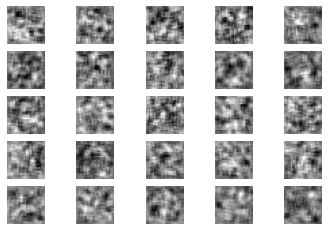

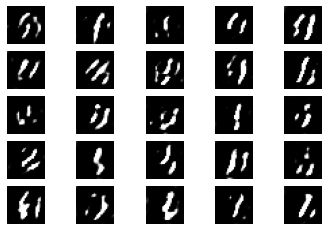

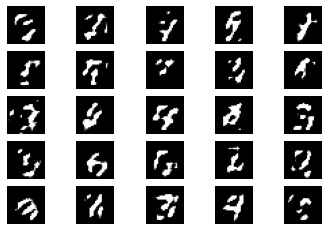

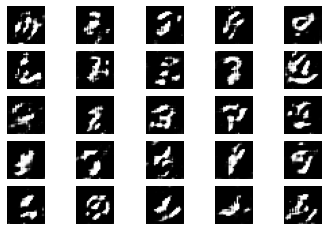

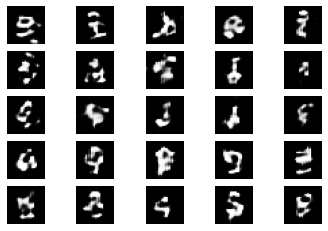

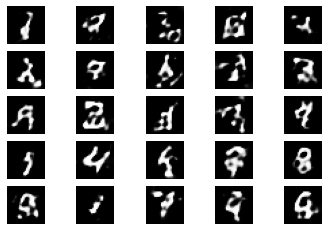

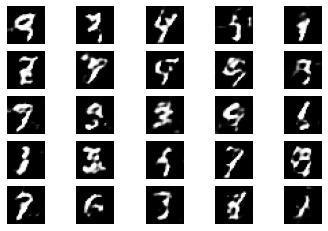

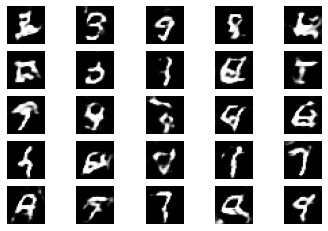

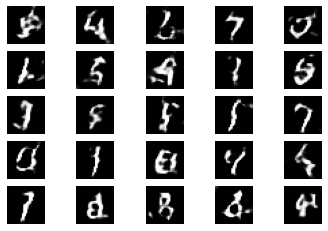

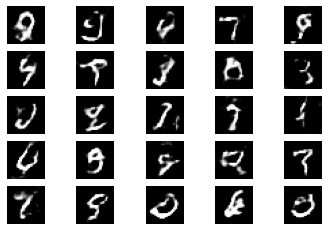

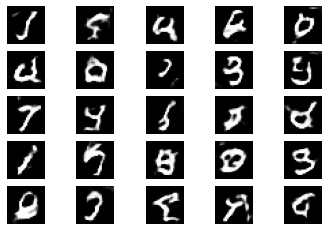

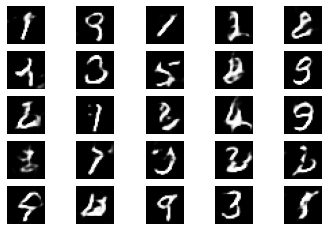

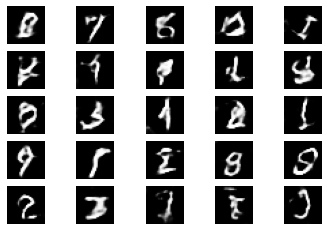

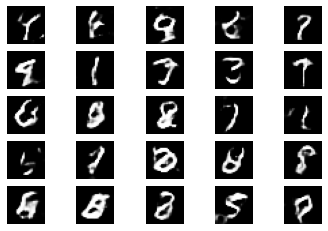

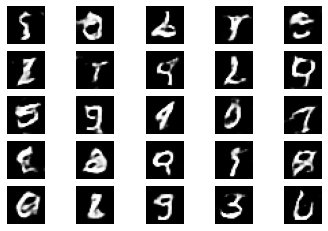

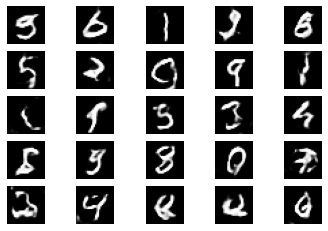

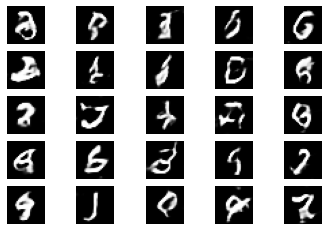

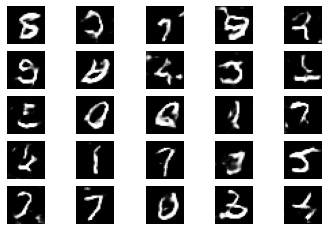

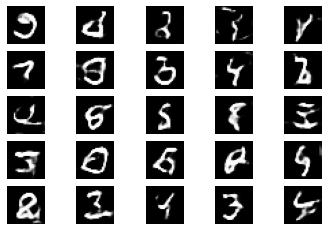

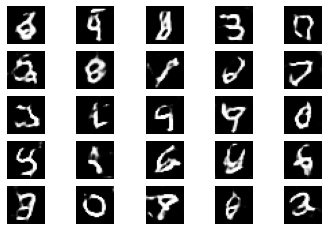

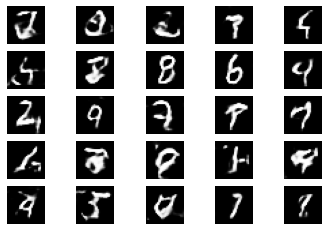

In [5]:
#신경망을 실행시키는 함수를 만듭니다.
def gan_train(epoch, batch_size, saving_interval):

  # MNIST 데이터 불러오기

  (X_train, _), (_, _) = mnist.load_data()  # 앞서 불러온 적 있는 MNIST를 다시 이용합니다. 단, 테스트과정은 필요없고 이미지만 사용할 것이기 때문에 X_train만 불러왔습니다.
  X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
  X_train = (X_train - 127.5) / 127.5  # 픽셀값은 0에서 255사이의 값입니다. 이전에 255로 나누어 줄때는 이를 0~1사이의 값으로 바꾸었던 것인데, 여기서는 127.5를 빼준 뒤 127.5로 나누어 줌으로 인해 -1에서 1사이의 값으로 바뀌게 됩니다.
  #X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

  true = np.ones((batch_size, 1))
  fake = np.zeros((batch_size, 1))

  for i in range(epoch):
          # 실제 데이터를 판별자에 입력하는 부분입니다.
          idx = np.random.randint(0, X_train.shape[0], batch_size)
          imgs = X_train[idx]
          d_loss_real = discriminator.train_on_batch(imgs, true)

          #가상 이미지를 판별자에 입력하는 부분입니다.
          noise = np.random.normal(0, 1, (batch_size, 100))
          gen_imgs = generator.predict(noise)
          d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)

          #판별자와 생성자의 오차를 계산합니다.
          d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
          g_loss = gan.train_on_batch(noise, true)

          print('epoch:%d' % i, ' d_loss:%.4f' % d_loss, ' g_loss:%.4f' % g_loss)

        # 이부분은 중간 과정을 이미지로 저장해 주는 부분입니다. 본 장의 주요 내용과 관련이 없어
        # 소스코드만 첨부합니다. 만들어진 이미지들은 gan_images 폴더에 저장됩니다.
          if i % saving_interval == 0:
              #r, c = 5, 5
              noise = np.random.normal(0, 1, (25, 100))
              gen_imgs = generator.predict(noise)

              # Rescale images 0 - 1
              gen_imgs = 0.5 * gen_imgs + 0.5

              fig, axs = plt.subplots(5, 5)
              count = 0
              for j in range(5):
                  for k in range(5):
                      axs[j, k].imshow(gen_imgs[count, :, :, 0], cmap='gray')
                      axs[j, k].axis('off')
                      count += 1
              fig.savefig("gan_images/gan_mnist_%d.png" % i)

gan_train(4001, 32, 200)  #4000번 반복되고(+1을 해 주는 것에 주의), 배치 사이즈는 32,  200번 마다 결과가 저장되게 하였습니다.